In [1]:
#同时输出一个cell多个结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'   
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing   #导入sklearn库中processing


In [11]:
#读入数据集
adult=pd.read_csv('D:/adult.csv')#读入adult数据集
adult.info()  #查看adult基本信息


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
adult['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

## 数据预处理

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245F76D6C48>,
      dtype=object)

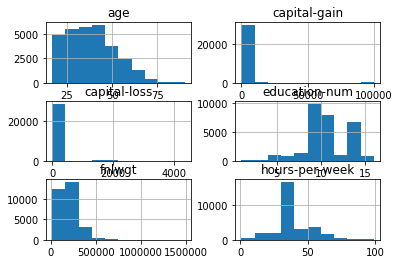

In [12]:
adult.replace('?',np.nan,inplace = True)  #adult中缺失值为？ 替换为np.nan 
adult.isnull().any()   #检测每列是否有缺失值
adult_new=adult.dropna()  #删除有缺失值的行
adult_new.isnull().any() # 检测新数据集是否有缺失值
adult_new.info()         #删除缺失值后的数据信息
adult_new.hist()

In [13]:
#数据标签列分开
adult_data=adult_new.iloc[:,:13]       
adult_target=adult_new['income']


,workclass,education,marital-status,occupation
0,State-gov,Bachelors,Never-married,Adm-clerical
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial
2,Private,HS-grad,Divorced,Handlers-cleaners
3,Private,11th,Married-civ-spouse,Handlers-cleaners
4,Private,Bachelors,Married-civ-spouse,Prof-specialty
...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct
32558,Private,HS-grad,Widowed,Adm-clerical
32559,Private,HS-grad,Never-married,Adm-clerical


In [14]:
#标签列转换为0，1
adult_target_new=adult_target.map({'<=50K':0,'>50K':1})  # 2分类 转换0 1

In [15]:
#数据列选取部分
adult_data=pd.DataFrame(adult_data,columns=['workclass','education','marital-status','occupation'] ) #选取几个标称列
adult_data

,workclass,education,marital-status,occupation
0,State-gov,Bachelors,Never-married,Adm-clerical
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial
2,Private,HS-grad,Divorced,Handlers-cleaners
3,Private,11th,Married-civ-spouse,Handlers-cleaners
4,Private,Bachelors,Married-civ-spouse,Prof-specialty
...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct
32558,Private,HS-grad,Widowed,Adm-clerical
32559,Private,HS-grad,Never-married,Adm-clerical


In [16]:
adult_data=pd.get_dummies(adult_data) #字符型onehot编码
adult_data     #查看数据集

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32559,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 留出法 30%测试集，70%训练集

In [9]:
#按比例划分训练集和测试集   
X_train,X_test,y_train,y_test = train_test_split(adult_data,adult_target_new,test_size=0.3,stratify=adult_target_new)# stratify 指定分层抽样的特征
y_test.value_counts()  #value_counts 查看每个值的数量
y_train.value_counts() #测试集的值分布与训练集一致

0    6797
1    2252
Name: income, dtype: int64

0    15857
1     5256
Name: income, dtype: int64

In [17]:
import  sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix  # 混淆矩阵
from sklearn.naive_bayes import CategoricalNB   #导入CategoricalNB
classfier = CategoricalNB()  # 分类器Naive Bayes 
y_pred = classfier.fit(X_train, y_train).predict(X_test)#训练 预测


array([[5951,  846],
       [ 824, 1428]], dtype=int64)

0.8154492209083877

0.6310207688908529

0.6341030195381883

0.6279683377308707

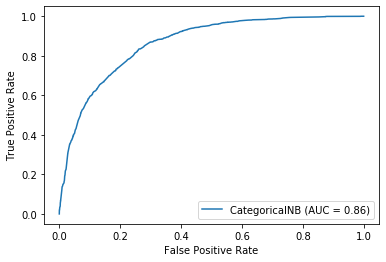

In [18]:
confusion_matrix(y_test, y_pred)  # 混淆矩阵
metrics.accuracy_score(y_test, y_pred)#准确率
metrics.f1_score(y_test, y_pred) #F1
metrics.recall_score(y_test, y_pred)   #召回率
metrics.precision_score(y_test, y_pred)  #精度
metrics.plot_roc_curve(classfier, X_test, y_test)# roc曲线

## 交叉验证

<p><font size="3" color="red"> 交叉验证ROC曲线，使用时<br/>
 &nbsp;&nbsp;  1. 更改对应数据集<br/>
 &nbsp;&nbsp; 2. 指定分类器 classifier<br/>
 &nbsp;&nbsp;  3. 根据需要，修改曲线属性</p>

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

[(-0.05, 1.05), (-0.05, 1.05), Text(0.5, 1.0, 'ROC曲线')]

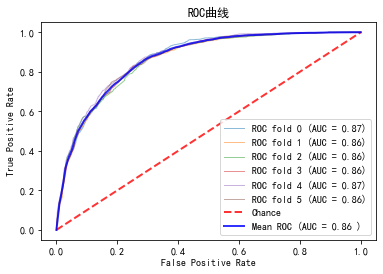

In [23]:
from sklearn.model_selection import cross_val_score  #交叉验证
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #图中文显示  SimHei 中文黑体字体
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc


X=np.array(adult_data)   # 数据
y=np.array(adult_target_new)       #标签  y

cv = StratifiedKFold(n_splits=6)  #n_splits 指定交叉验证折数，默认5

classifier = CategoricalNB()    #分类器，朴素贝叶斯
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100) #返回指定间隔上的等距数字 0-1之间  100个
fig, ax = plt.subplots()  #创建图形fig,ax

## n折交叉验证，每次训练画一条曲线，循环n次
for i, (train, test) in enumerate(cv.split(X, y)):    #cv.split(X, y)返回split的index
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.5, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)  #插入点
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

#画出AUC为0.5的线
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',    
        label='Chance', alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)    #平均tpr
mean_tpr[-1] = 1.0      
mean_auc = auc(mean_fpr, mean_tpr)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f )' %(mean_auc),lw=2, alpha=.8)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC曲线")  #图片名称，可修改
ax.legend(loc="lower right")   #图例
plt.show()